In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:

import sys
import os
import isaacgym
sys.path.append("../../")
from environments.isaac_simulation.env import ISAACSimulationEnv
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt


from utils.logging import CustomLogger
from utils import logging
from agents import agent_factory
from apis.detectors import OWLViT
from apis.segmentors import SAM

from executor import SimpleExecutor, LineWiseExecutor

from utils.image_utils import visualize_image


Importing module 'gym_38' (/data/bigdata/humit-wk/workspace/grasp/isaacgym/python/isaacgym/_bindings/linux-x86_64/gym_38.so)
Setting GYM_USD_PLUG_INFO_PATH to /data/bigdata/humit-wk/workspace/grasp/isaacgym/python/isaacgym/_bindings/linux-x86_64/usd/plugInfo.json


/home/wufisher/miniconda3/envs/rlgpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version 2.2.2
Device count 0
/data/bigdata/humit-wk/workspace/grasp/isaacgym/python/isaacgym/_bindings/src/gymtorch


Using /home/wufisher/.cache/torch_extensions/py38_cpu as PyTorch extensions root...
Emitting ninja build file /home/wufisher/.cache/torch_extensions/py38_cpu/gymtorch/build.ninja...
Building extension module gymtorch...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module gymtorch...


In [3]:
#本机跑serveice别用这个代理
#os.environ["HTTP_PROXY"] = "http://127.0.0.1:7890"
# os.environ["HTTPS_PROXY"] = "http://127.0.0.1:7890"
# os.environ["OPENAI_API_KEY"] =""

In [4]:
logger = CustomLogger()
logging.set_logger(logger)

In [5]:
import numpy as np
np.random.seed(114514)

In [6]:
isaac_env=ISAACSimulationEnv(enable_gui=False)

In [7]:
isaac_env.setup("need_charger")

Not connected to PVD
+++ Using GPU PhysX
Physics Engine: PhysX
Physics Device: cuda:0
GPU Pipeline: disabled


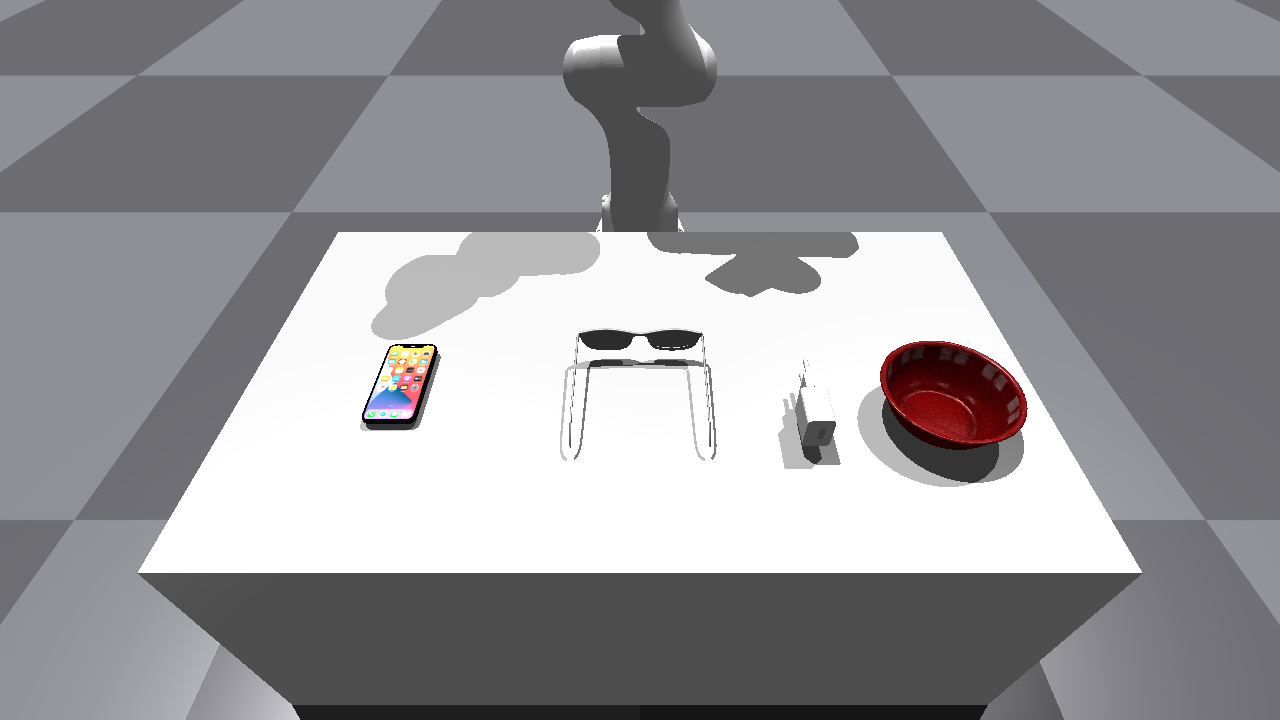

In [8]:
img = isaac_env.get_image()
img

In [9]:
# len(img)

In [10]:
depths = isaac_env.task._env.get_depth()

In [11]:
depths[400][20]

-1.3300463

In [12]:
for i in range(1280):
    if depths[400][i] >= -0.99:
        print(i)
        print(depths[400][i])
        break

239
-0.7980273


In [13]:
u,v = 400, 368
depth = depths[u][v]

In [14]:
isaac_env.task._env.pixel_to_position((u,v),-depth)

cx,cy,cz 0.040954119549260044 0.33120755553245546 -0.7793119
gym  transform matrix [[ 0.         0.7071068 -0.7071067  0.       ]
 [-1.         0.        -0.         0.       ]
 [ 0.         0.7071067  0.7071068  0.       ]
 [-0.        -0.2828426 -1.1313709  1.       ]]


[-0.01998432825678098, 0.33120755553245546, 0.47790224761166633]

In [15]:
import numpy as np
np.arcsin(0.70710674)*180/np.pi

44.99999666271723

In [17]:
# np.transpose( [[ 0.      ,   0.7071068 ,-0.7071067  ,0.       ],
#  [-1.   ,      0.    ,    -0.      ,   0.       ],
#  [ 0.    ,     0.7071067 , 0.7071068,  0.       ],
#  [-0.      ,  -0.2828426, -1.1313709 , 1.       ]])

array([[ 0.       , -1.       ,  0.       , -0.       ],
       [ 0.7071068,  0.       ,  0.7071067, -0.2828426],
       [-0.7071067, -0.       ,  0.7071068, -1.1313709],
       [ 0.       ,  0.       ,  0.       ,  1.       ]])